## Magic Preprocessing
Paper: https://www.sciencedirect.com/science/article/pii/S0092867418307244?via%3Dihub

In [1]:
import magic
import scprep
import os
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import pickle

Matplotlib created a temporary config/cache directory at /tmp/pbs.4363428.pbsha.ib.sockeye/matplotlib-pmjtm09w because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
paths = {
    'cite': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_cite_inputs_raw_values.sparse.npz',
    'cite_cols': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_cite_inputs_raw_idxcol.npz', 
    'multiome': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_multi_inputs_raw_values.sparse.npz',
    'multiome_cols': '/arc/project/st-jiaruid-1/shenoy/data/multiome-sparse-rc/train_multi_inputs_raw_idxcol.npz',
}

In [3]:
modality = 'cite'

In [4]:
path = paths[modality]
assert os.path.exists(path)

In [5]:
df = pd.DataFrame.sparse.from_spmatrix(
    sparse.load_npz(path), 
    columns=list(np.load(paths[f'{modality}_cols'], allow_pickle=True)['columns'])
)

In [6]:
df.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,2.0,5.0,0.0,0.0,0.0,1.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0


#### remove unexpressed genes

In [7]:
df = scprep.filter.filter_empty_genes(df)

#### Normalize the Data

In [8]:
df = scprep.normalize.library_size_normalize(df, rescale='mean')

#### Run Magic on df

In [9]:
magic_op = magic.MAGIC(solver='exact', knn=15)

In [10]:
df_magic = magic_op.fit_transform(df, genes='all_genes')
df_magic.head()

Calculating MAGIC...
  Running MAGIC on 70988 cells and 21601 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 310.18 seconds.
    Calculating KNN search...
    Calculated KNN search in 1378.68 seconds.
    Calculating affinities...
    Calculated affinities in 1462.33 seconds.
  Calculated graph and diffusion operator in 3159.76 seconds.
  Running MAGIC with `solver='exact'` on 21601-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 179.00 seconds.
Calculated MAGIC in 3343.22 seconds.


,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,0.010858,0.041825,0.000000,0.014262,0.000000,0.007689,0.579352,0.374163,0.106598,0.475315,...,0.284287,0.355466,0.383638,1.739598,0.029395,0.044875,0.190298,0.191697,1.094810,0.157417
1,0.007470,0.053195,0.000011,0.038094,0.000000,0.004532,0.750526,0.353839,0.123079,0.454229,...,0.215515,0.417579,0.430878,1.679650,0.039272,0.028312,0.151604,0.229408,0.871405,0.115873
2,0.012731,0.025037,0.002917,0.024417,0.000000,0.190535,0.651574,0.671894,0.065042,0.310354,...,0.337823,0.445731,0.559158,1.702689,0.046159,0.070621,0.282717,0.541919,0.182499,0.235742
3,0.012357,0.039746,0.000064,0.017979,0.000020,0.001557,0.671760,0.442253,0.022004,0.517288,...,0.276341,0.600423,0.767811,1.922571,0.016451,0.052196,0.343774,0.414230,1.633279,0.336167
4,0.033331,0.075530,0.000296,0.013070,0.000025,0.051697,0.748886,0.540322,0.032730,0.500510,...,0.415554,0.649898,0.986143,3.082568,0.013115,0.043884,0.291377,0.489945,1.247721,0.272200


In [13]:
svd = TruncatedSVD(n_components=128)
df_magic_transformed = svd.fit_transform(df_magic)

In [14]:
path = '/scratch/st-jiaruid-1/shenoy/data/svd-magic-denoised-128svd.pkl'
with open(path, 'wb') as f:
    pickle.dump(df_magic_transformed, f)

In [33]:
df_magic_pd = pd.DataFrame(df_magic, columns=list(df.columns))

#### let's plot stuff

In [34]:
l = list(df.columns)
[x for x in l if x.split('_')[1] in ['MPO', 'KLF1', 'IFITM1']]

['ENSG00000185885_IFITM1', 'ENSG00000105610_KLF1', 'ENSG00000005381_MPO']

#### Plot for the genes

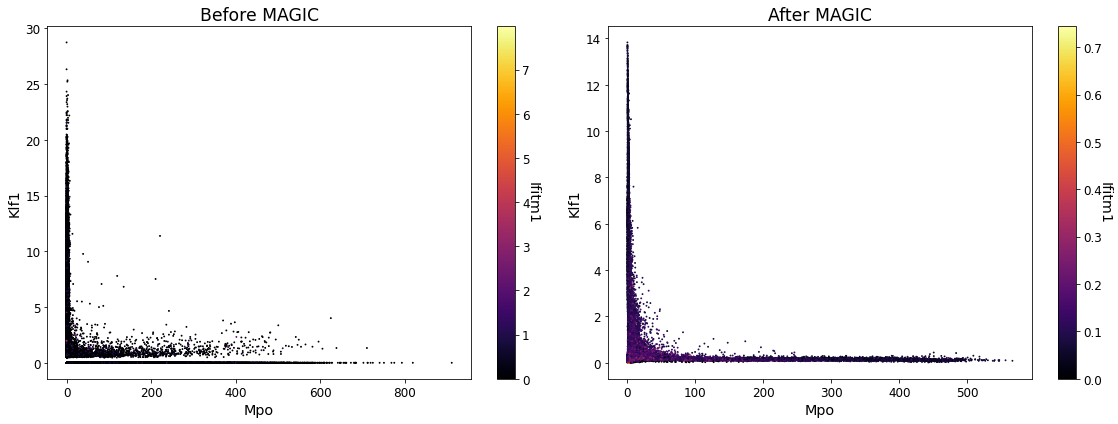

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

scprep.plot.scatter(x=df['ENSG00000005381_MPO'], y=df['ENSG00000105610_KLF1'], c=df['ENSG00000185885_IFITM1'],  ax=ax1,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='Before MAGIC')

scprep.plot.scatter(x=df_magic_pd['ENSG00000005381_MPO'], y=df_magic_pd['ENSG00000105610_KLF1'], c=df_magic_pd['ENSG00000185885_IFITM1'], ax=ax2,
                    xlabel='Mpo', ylabel='Klf1', legend_title="Ifitm1", title='After MAGIC')

plt.tight_layout()
plt.show()